# <span style='text-align: center'>Project Proposal</span>

<hr>

## Executive Summary

The Restaurant Segmentation Analysis project is a collaboration between Sitewise Analytics and MDS students Chen Lin, Eric Tsai, Morris Zhao, and Xinru Lu. This project aims to use machine learning methods to determine factors that drive traffic to a particular location and  identify clusters of similar store locations. In the following proposal, we will first highlight the problem and fundamental goals of the project, then discuss the data science techniques that we will employ to tackle the problem, and conclude with a rough timeline of the project.

<hr>

## Introduction

Restaurants seeking to open new stores in a region need to make marketing plans according to the major customer group. Therefore, restaurant franchise owners need to know the factors that drive traffic to a location, such as the surrounding population demographic and consumer behaviour in the region, as well as trade area and nearby competitor/sister store information. By having a strong grasp of these factors, owners can plan future expansions and market the new location strategically based on the demand of the region. The Restaurant Segmentation Analysis project will address this problem by using data from Smoothie King locations in the United States and Subway locations in Canada and the United States to build machine learning data pipelines for Sitewise Analytics to incorporate into their consulting service. At the end of the project, we expect to have human-interpretable machine learning models that cluster similar store locations, which will be helpful for Sitewise Analytics clients to identify factors that drive traffic in those similar locations. 

More specifically, we will be building three separate machine learning pipelines:
1. A supervised machine learning pipeline using data from Smoothie King locations to predict a store’s category from one of five categories:
    - Home
    - Shopping
    - Work
    - Travel
    - Other

    The prediction will be human-interpretable in that users can identify features that determine the prediction of a store location’s category.

2. An unsupervised machine learning pipeline based on data of US Subway locations that clusters locations by similar features.

3. An unsupervised machine learning pipeline based on data of Canadian Subway locations that clusters locations by similar features.

    The two unsupervised machine learning pipelines will also have human-interpretable results, including ways to identify similar features that caused different locations to be clustered together.

The final product presented to Sitewise Analytics will be a GitHub repository containing the code for the machine learning data pipelines. Moreover, documentation of the scripts that can be run to reproduce the results will be included.

<hr>

## Data Summary

We received five datasets for three popular chain restaurants: Smoothie King, Subway Canada, and Subway USA. The dataset consists of CSV files for demographic, point of interest, store-specific data, competition sister store data, and trade area, where each row represents a single store location and the columns represent the variables/features of that store. All features in the demographic, point of interest, competition sister store, and trade area files are numeric, whereas the store-specific data files contain categorical features such as state and market size.

To enhance the understanding of the behavior of the data, we select some significant features and create visualizations to depict their distribution across categories.

<hr>

## Data Science Techniques

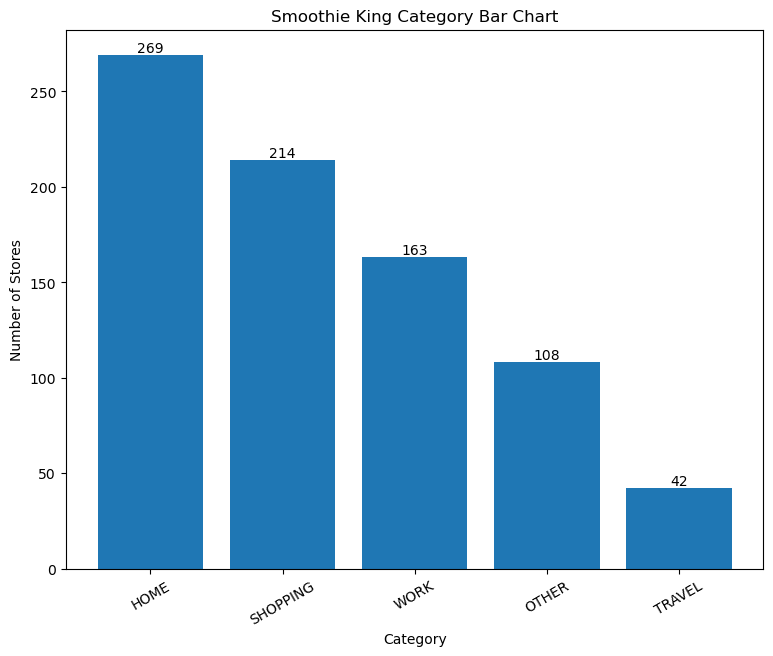
<!-- <center><img src='../img/smoothie_category_bar_plot.png' width='600px' style='padding-top:60px'></center> -->
<span style='padding-left:50px'><center><b>Figure 1</b><br> Number of stores in each category for Smoothie King US locations. The distribution is unbalanced.</center></span>

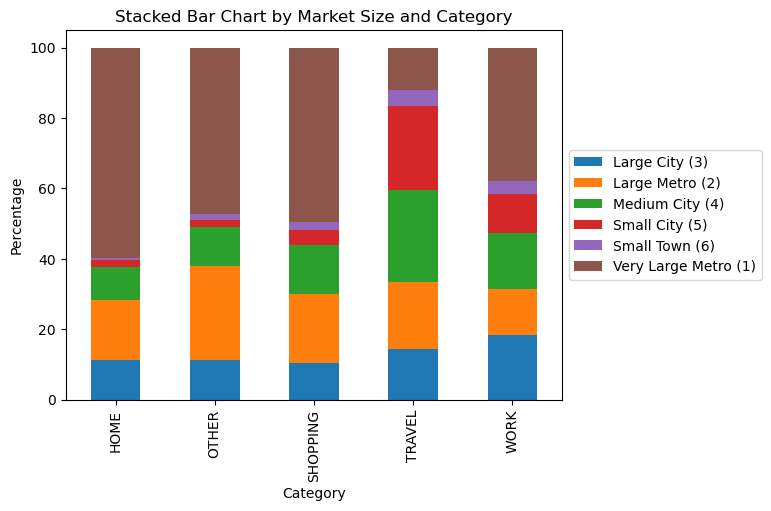
<!-- <center><img src='../img/smoothie_store_density_bar_plot.png' width='600px' style='padding-top:60px'></center> -->
<span style='padding-left:50px'><center><b>Figure 2</b></center></span>

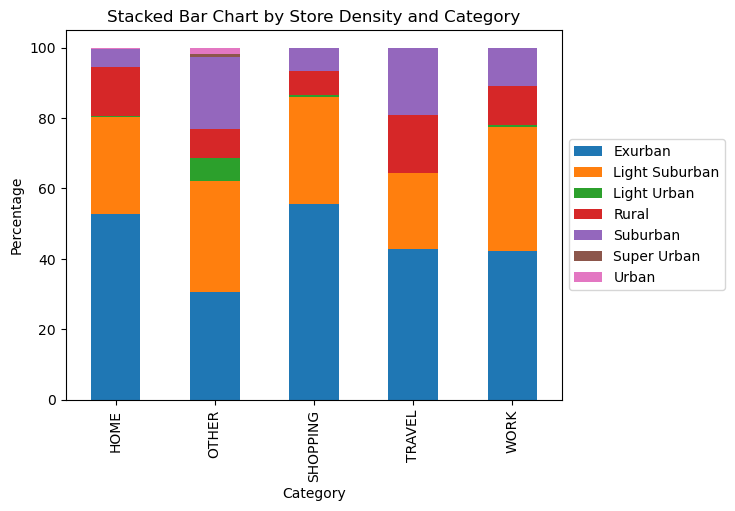
<!-- <center><img src='../img/smoothie_market_size_bar_plot.png' width='600px' style='padding-top:60px'></center> -->
<span style='padding-left:50px'><center><b>Figure 3</b></center></span>

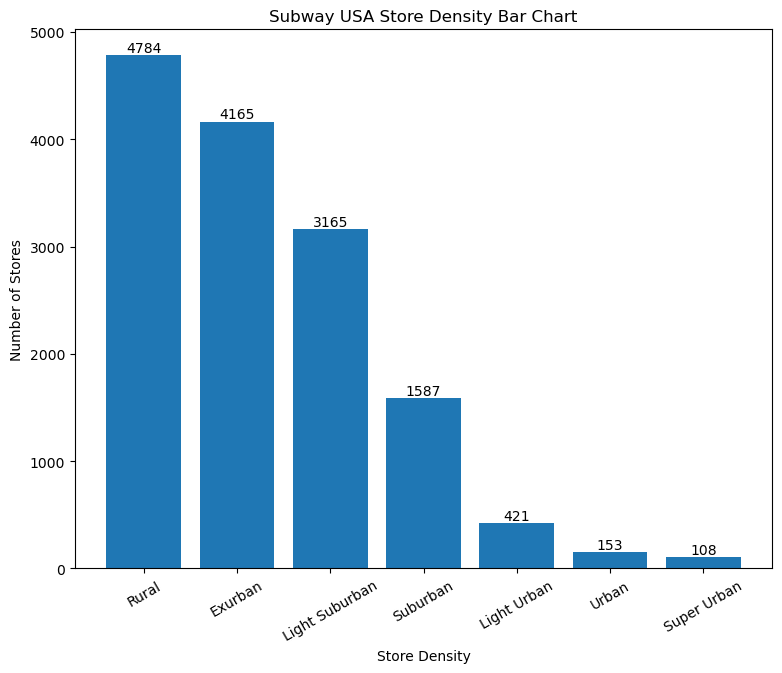
<!-- <center><img src='../img/subway_us_store_density_bar_plot.png' width='600px' style='padding-top:60px'></center> -->
<span style='padding-left:50px'><center><b>Figure 4</b>: <br> Rural has the highest count.</center></span>

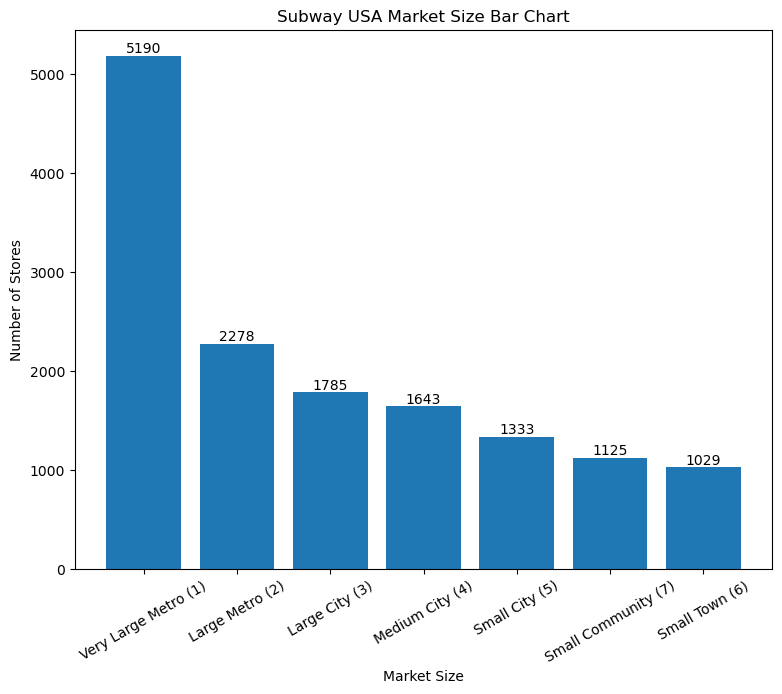
<!-- <center><img src='../img/subway_us_market_size_bar_plot.png' width='600px' style='padding-top:60px'></center> -->
<span style='padding-left:50px'><center><b>Figure 5</b>: <br> Very Large Metro has the highest count with 5190 stores, and other categories have similar counts.</center></span>

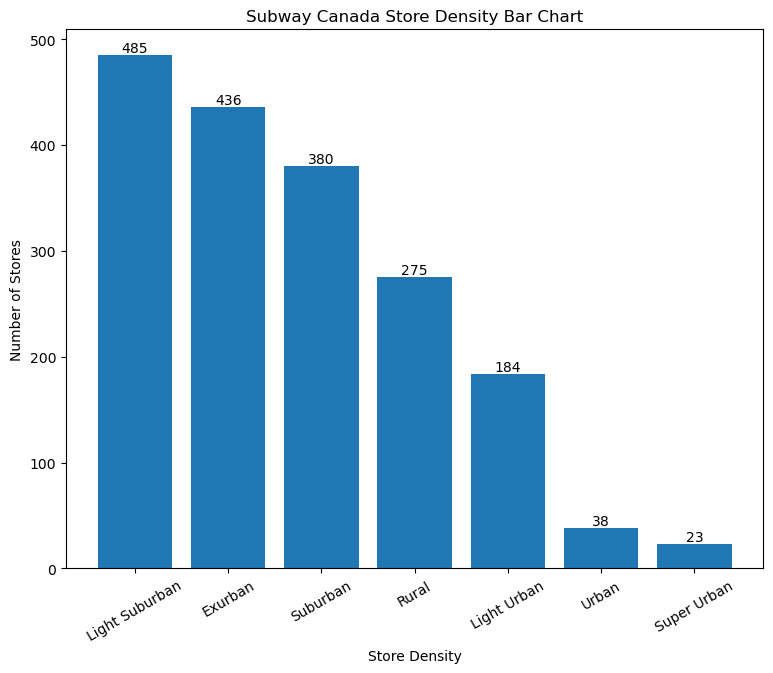
<!-- <center><img src='../img/subway_canada_store_density_bar_plot.png' width='600px' style='padding-top:60px'></center> -->
<span style='padding-left:50px'><center><b>Figure 6</b>: <br> The most common market size is Very Large Metro with 577 stores.</center></span>

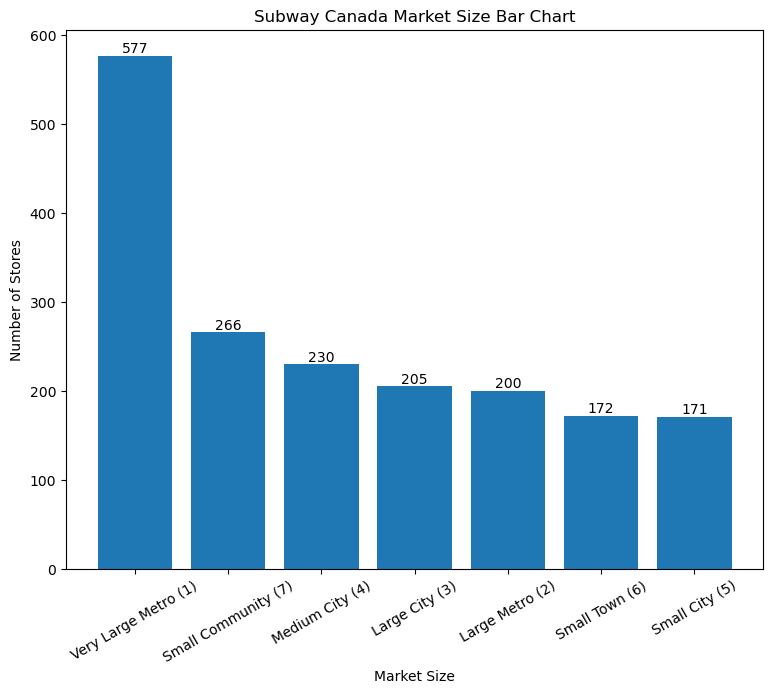
<!-- <center><img src='../img/subway_canada_market_size_bar_plot.png' width='600px' style='padding-top:60px'></center> -->
<span style='padding-left:50px; padding-bottom: 80px'><center><b>Figure 7</b>: <br> Very Large Metro has the highest count with 577 stores, and the other categories have similar counts.</center></span>

Based on the data described above with the important insights highlighted from some important features, along with the problems to be resolved for each restaurant chain which were mentioned in the *Introduction* section, the initial approaches and the corresponding evaluation metrics to be used are as followings:

1. 

For Smoothie King, there are over 1000 features for surrounding population demographic, consumer behaviour, and store information for the 796 US store locations. Among these features, many of them are highly correlated to one another. Therefore, it is important to start with the feature selection and dimensionality reduction process. Other than manually analyzing the data columns with correlation scores, we are planning to use Principal Component Analysis (PCA) to reduce the dimension and Recursive Feature Elimination method to select the most important features. 

With the data and the supervised classification objective, we propose to start with a Logistic Regression model as our baseline. We will also explore other models such as a simple Random Forest Tree regression model, as well as an LGBMClassifier as it effectively trains high-dimensional datasets and usually leads to relatively high accuracy for the multi-class problems. 

With the labeled data, the models will be evaluated by its accuracy score, with the target being 80% accuracy. The score would indicate if the model is capable of detecting the most important traffic driving factor to a store. The result can be interpreted with SHAP (SHapley Additive exPlanations) plots where we can visualize which features drive the decision of a particular category assignment for a certain store.

2. 

For Subway USA, the corresponding dataset has over 1000 features combined with similar information as mentioned above for Smoothie King, for approximately 14,000 stores across the US. The main goal is to cluster the stores into different clusters where stores share similar features within the same cluster. We propose starting with a DBSCAN model as a baseline and evaluate the clusters empirically. Afterwards, we will perform a Hierarchical clustering and apply PCA for dimensionality reduction and compare the results. 

Since both Smoothie King and Subway US are both in the US and share similar features in the dataset, they could share similar segmentations to a certain extent. To perform PCA, the most driven features from the supervised model for Smoothie King can be used as a reference to evaluate this PCA step where more matched important features could indicate a more proper PCA. 

During the clustering, all possible linkage criteria would be tested to evaluate how to find similarities between clusters. Finally, since ground truth labels are not known, evaluation can be done through the Silhouette Coefficient where a higher Silhouette Coefficient score suggests that a model defines well separated clusters. 

To interpret the results and empirically validate the clusters, a potential approach is to randomly select a sample of stores in the same cluster and visualize them on Google Maps/Sitewise Internal application to check if they share similar geographic attributes (near highway exits, dense residential area, etc.).

3. 

For Subway Canada, the corresponding dataset has relatively fewer features (a few hundreds of features combined with similar information as mentioned above for Smoothie King, for approximately 1800 stores in Canada) compared to the other 2 restaurant chains. We will take a similar approach to Subway US and evaluate the result. 

If the performance is not ideal, consider removing the PCA step and run clustering again to evaluate the result again with the Silhouette Coefficient score and check Google Maps.

<hr>

## Timeline

| <b>Weekly Schedule</b>            |                                        | **Objective**                                                                                                                                                  |
|--------------------------|----------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Week 1 <br>(5/1 - 5/7)**   | EDA & Proposal                         | Understand the problem, perform initial EDA on the dataset, and propose potential models and approaches to each objective.                                     |
| **Week 2 <br>(5/8 - 5/14)**  | Feature Selection                      | Explore a variety of methods to determine the most important features for each of the three datasets.                                                          |
| **Week 3 <br>(5/15 - 5/21)** | Supervised Model                       | Train and test a supervised classification model on the labeled dataset, as well as a list of the most important features as major indicators.                 |
| **Week 4 <br>(5/22 - 5/28)** | Unsupervised Model (part I)            | Train an unsupervised clustering model on one of the unlabeled datasets and apply several potential evaluation metrics.                                        |
| **Week 5 <br>(5/29 - 6/4)**  | Unsupervised Model (part II)           | Train an unsupervised clustering model on the other unlabeled datasets and apply several potential evaluation metrics.                                         |
| **Week 6 <br>(6/5 - 6/11)**  | Models Tuning & Parameter Optimization | Perform parameter tuning and optimization on the three models.                                                                                                 |
| **Week 7 <br>(6/12 - 6/18)** | Final Presentation                     | Present the final models as well as the list of important indicators from the list of features. Address potential directions and approaches for further study. |
| **Week 8 <br>(6/19 - 6/28)** | Final Product & Reflection             | Draft submission for the final product and report and iterate on feedback before final submission.                                                             |
